### M Aizaz Ud Din

### CHAPTER 5

In [1]:
import pandas as pd
import mglearn
import matplotlib.pyplot as plt
import numpy as np

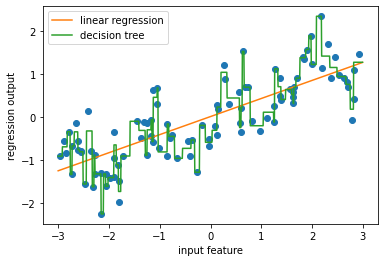

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
X, y = mglearn.datasets.make_wave(n_samples=100)
plt.plot(X[:, 0], y, 'o')
line = np.linspace(-3, 3, 1000)[:-1].reshape(-1, 1)
reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="linear regression")
reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="decision tree")
plt.ylabel("regression output")
plt.xlabel("input feature")
plt.legend(loc="best")

In [3]:
np.set_printoptions(precision=2)
bins = np.linspace(-3, 3, 11)
bins

array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ])

In [4]:
which_bin = np.digitize(X, bins=bins)
print("\nData points:\n", X[:5])
print("\nBin membership for data points:\n", which_bin[:5])



Data points:
 [[-0.75]
 [ 2.7 ]
 [ 1.39]
 [ 0.59]
 [-2.06]]

Bin membership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [5]:
from sklearn.preprocessing import OneHotEncoder
# transform using the OneHotEncoder.
encoder = OneHotEncoder(sparse=False)
# encoder.fit finds the unique values that appear in which_bin
encoder.fit(which_bin)
# transform creates the one-hot encoding
X_binned = encoder.transform(which_bin)
print(X_binned[:5])


[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


Text(0.5, 0.98, 'linear_binning')

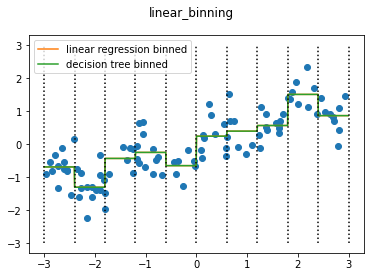

In [6]:
line_binned = encoder.transform(np.digitize(line, bins=bins))
plt.plot(X[:, 0], y, 'o')
reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')
reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned')
for bin in bins:
 plt.plot([bin, bin], [-3, 3], ':', c='k')
plt.legend(loc="best")
plt.suptitle("linear_binning")

(100, 11)


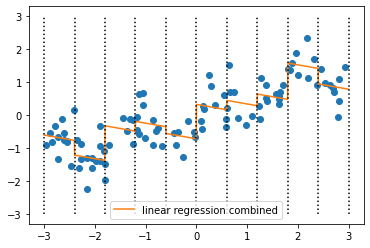

In [7]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)
(100, 11)
plt.plot(X[:, 0], y, 'o')
reg = LinearRegression().fit(X_combined, y)
line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regression combined')
for bin in bins:
 plt.plot([bin, bin], [-3, 3], ':', c='k')
plt.legend(loc="best")

In [8]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(100, 20)


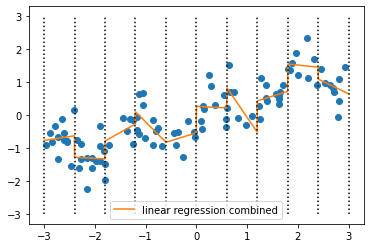

In [9]:
plt.plot(X[:, 0], y, 'o')
reg = LinearRegression().fit(X_product, y)
line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='linear regression combined')
for bin in bins:
 plt.plot([bin, bin], [-3, 3], ':', c='k')
plt.legend(loc="best")

In [10]:
X.shape

(100, 1)

In [11]:
from sklearn.preprocessing import PolynomialFeatures
# include polynomials up to x ** 10:
poly = PolynomialFeatures(degree=10)
poly.fit(X)
X_poly = poly.transform(X)

In [12]:
X_poly.shape

(100, 11)

In [13]:

poly.powers_

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

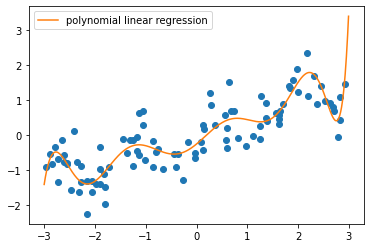

In [14]:
plt.plot(X[:, 0], y, 'o')
reg = LinearRegression().fit(X_poly, y)
line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.legend(loc="best")


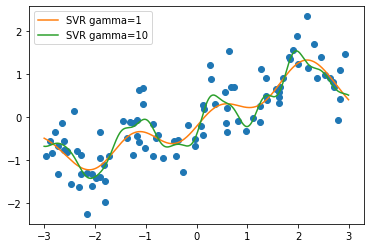

In [15]:
from sklearn.svm import SVR
plt.plot(X[:, 0], y, 'o')
for gamma in [1, 10]:
 svr = SVR(gamma=gamma).fit(X, y)
 plt.plot(line, svr.predict(line), label='SVR gamma=%d' % gamma)
plt.legend(loc="best")


In [16]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)
# rescale data:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [17]:
X_train_scaled.shape

(379, 13)

In [18]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print(X_train.shape)
print(X_train_poly.shape)


(379, 13)
(379, 105)


In [19]:
print(poly.get_feature_names())

['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [20]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("score without interactions: %f" % ridge.score(X_test_scaled, y_test))
ridge = Ridge().fit(X_train_poly, y_train)
print("score with interactions: %f" % ridge.score(X_test_poly, y_test))


score without interactions: 0.621458
score with interactions: 0.753478


### Univariate Non-linear transformations

In [21]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

In [22]:
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
noise

array([[ 0.5 , -0.14,  0.65, ...,  1.06,  0.34, -1.76],
       [ 0.32, -0.39, -0.68, ...,  0.26,  0.01, -0.23],
       [-1.42, -0.42, -0.34, ..., -1.32,  0.52,  0.3 ],
       ...,
       [ 1.11,  0.14,  0.96, ...,  0.05,  1.65, -0.14],
       [-0.36, -0.02,  2.18, ...,  0.1 , -0.4 , -0.42],
       [ 0.15, -1.  , -1.01, ...,  0.48,  0.14, -1.12]])

In [23]:
X_w_noise = np.hstack([cancer.data, noise])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)


In [25]:
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)

X_train_selected = select.transform(X_train)
print(X_train.shape)
print(X_train_selected.shape)


(284, 80)
(284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


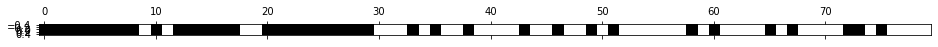

In [26]:
mask = select.get_support()
print(mask)
# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')


In [27]:
from sklearn.linear_model import LogisticRegression
# transform test data:
X_test_selected = select.transform(X_test)
lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Score with all features: %f" % lr.score(X_test, y_test))
lr.fit(X_train_selected, y_train)
print("Score with only selected features: %f" % lr.score(X_test_selected, y_test))


Score with all features: 0.919298
Score with only selected features: 0.915789


D:\Install\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Install\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check

In [28]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold="median")

In [29]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print(X_train.shape)
print(X_train_l1.shape)


(284, 80)
(284, 40)


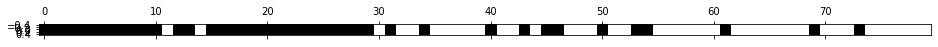

In [30]:
mask = select.get_support()
# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')


In [31]:
X_test_l1 = select.transform(X_test)
LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)


D:\Install\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9298245614035088

### Iterative feature selection

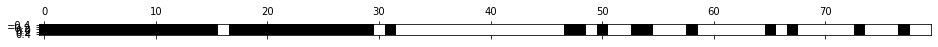

In [32]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)
#select = RFE(LogisticRegression(penalty="l1"), n_features_to_select=40)
select.fit(X_train, y_train)
# visualize the selected features:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')


In [33]:
X_train_rfe= select.transform(X_train)
X_test_rfe= select.transform(X_test)
LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)


D:\Install\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9298245614035088

In [34]:
select.score(X_test, y_test)


0.9508771929824561

### Utilizing Expert Knowledge

In [76]:
from importlib import reload
reload(mglearn.datasets)
citibike = mglearn.datasets.load_citibike()


In [77]:
#citibike = citibike.resample("3h").fillna(0)

In [78]:
citibike.head()

starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64

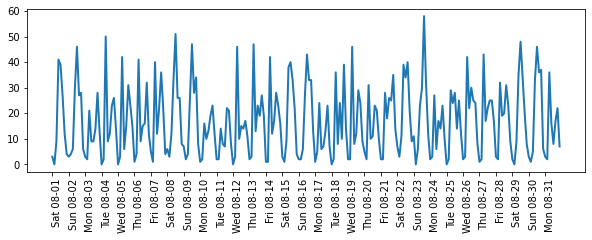

In [54]:
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(), freq='D')
plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation=90, ha="left")
plt.plot(citibike, linewidth=2)

In [55]:
y = citibike.values


In [81]:
from datetime import datetime
now = datetime.now() 

In [83]:
X = citibike.index.datetime.strftime("%s").astype("int").reshape(-1, 1)

AttributeError: 'DatetimeIndex' object has no attribute 'datetime'

In [62]:
X = citibike.index

In [68]:
months = [x.month for x in citibike.index]
years = [x.year for x in citibike.index]
day = [x.day for x in citibike.index]

In [69]:
X = np.array([day, months, years]).T

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [71]:
n_train = 184
def eval_on_features(features, target, regressor):
 # split the given features into a training and test set
    X_train, X_test = features[:n_train], features[n_train:]
 # split also the 
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("Test-set R^2: ", regressor.score(X_test, y_test))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))
    plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation=90, ha="left");
    plt.plot(range(n_train), y_train, label="train", linewidth=2)
    plt.plot(range(n_train, len(y_test) + n_train), y_test, label="test", linewidth=2)
    plt.plot(range(n_train), y_pred_train, label="prediction train", linewidth=2)
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, label="prediction test", linewidth=2)
    plt.legend(loc=(1.01, 0))


Test-set R^2:  -0.08969194068698405


<Figure size 432x288 with 0 Axes>

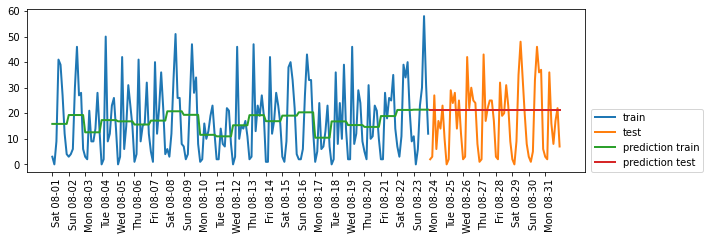

In [74]:
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
plt.figure()
eval_on_features(X, y, regressor);

In [91]:
X_hour = citibike.index.hour
X_hour =np.array(X_hour).reshape(-1,1)

Test-set R^2:  0.5995775993305429


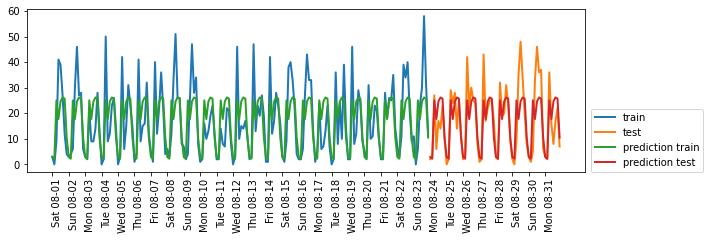

In [92]:
eval_on_features(X_hour, y, regressor)


In [110]:
w=citibike.index.dayofweek
h=citibike.index.hour

In [111]:
w.shape,h.shape

((248,), (248,))

In [114]:
w=np.array(w).reshape(-1,1)
h=np.array(h).reshape(-1,1)

In [115]:
w.shape,h.shape

((248, 1), (248, 1))

In [116]:
X_hour_week = np.hstack([w,h])
#X_hour_week =np.array(X_hour_week).reshape(-1,1)

In [117]:
X_hour_week.shape

(248, 2)

Test-set R^2:  0.8419488587966024


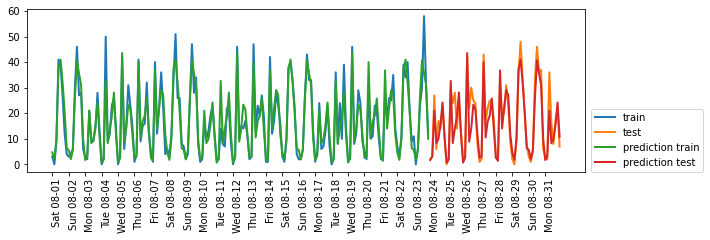

In [118]:
eval_on_features(X_hour_week, y, regressor)

Test-set R^2:  0.13204157262163152


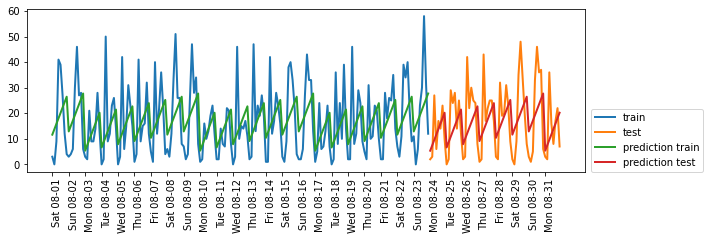

In [119]:
eval_on_features(X_hour_week, y, LinearRegression())

Test-set R^2:  0.6191139168658686


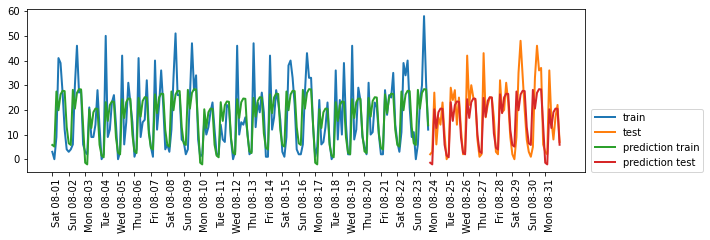

In [120]:
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()
eval_on_features(X_hour_week_onehot, y, Ridge())


In [121]:
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)

Test-set R^2:  0.8451706357968556


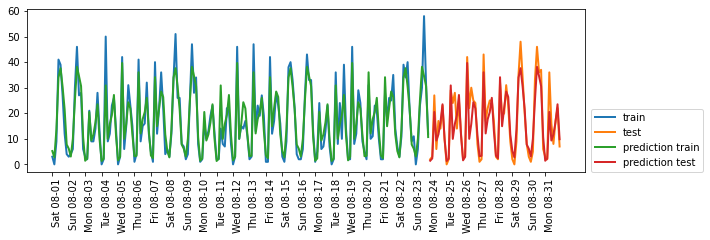

In [122]:
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)


In [123]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
features = day + hour


In [124]:
features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]


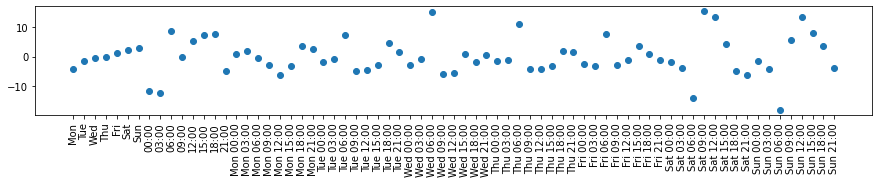

In [125]:
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90);